# Chemoinformatics ( Cheminformatics ; 화학정보학 )


* 수많은 화합물들의 데이터를 효과적으로 활용하기 위해 컴퓨터를 이용하는 방법을 강구하는 학문.
* 화학은 분자를 데이터화 해야하며 예를들면, 어떤 분자는 원자들과 원자들 사이의 결합, 성질, 화학반응을 표현해주어야 한다.
<br>

* Major Fields of `Chemoinformatics`
> * Structure Database
> * Quantitative Structure - Activity Relationship
> * Molecular Modeling
> * Structure Elucidation(분광화학적 예측) -> Chemometrics
> * Chemical Reaction and Synthesis Design
<br>
<br>

* 화학적 성질, 구조의 데이터를 이용해 제약, 정유, 고분자, 의학 분야로의 활용이 가능하다.
* 분자의 성질 및 구조를 컴퓨터가 처리할 수 있는 언어(1차원 string)로 사용하기 위해 여러가지 방법 중 `SMILES`과 `SMARTS`가 있다.

# SMILES( Simplified Molecular Input Line Entry System )

* 분자와 화학반응을 문자로 표기하여 간단하면서 포괄적인 화학 언어이다.
* 간단한 규칙들을 이용해 복합적인 표현이 가능하며, 이를 통해 화학 Data를 입력할 수 있다.

> 원자, 결합, 치환기, 고리, 방향성 등  여러 표현법들이 있다.

<h3>SMILES | <h3> <center>Name</center> | <h3>SMILES | <h3><center>Name</center>
---- | ---- | ---- | ----
<h3>CC |<h3>ethane(에테인)|<h3> [OH3+] | <h3>hydronium ion(수산화 이온)
<h3>O=C=O |<h3>carbon dioxide(이산화탄소)| <h3>[2H]O[2H] | <h3>deuterium oxide(중수:$^{2}H_{2}Water, D_{2}O$)
<h3>C#N |<h3>hydrogen cyanide(사이안화 수소,HCN)| <h3>[235U] | <h3>uranium-235
<h3>CCN(CC)CC |<h3>triethylamine(트리에틸아민,$C_{6}H_{15}N$)|<h3> F/C=C/F |<h3> E-difluoroethene($C_{2}H_{4}F_{2}$)
<h3>CC(=O)O |<h3>acetic acid(아세트산)|<h3> F/C=C\F | <h3>Z-difluoroethene($C_{2}H_{4}F_{2}$)
<h3>C1CCCCC1 |<h3>cyclohexane(사이클로 헥세인,$C_{6}H_{12}$)|<h3> N'['C@@H']'(C)C(=O)O |<h3> L-alanine ($CH_{3}CH(NH_{3})COOH$)
<h3>c1ccccc1 |<h3>benzene(벤젠)| <h3>N'['C@H']'(C)C(=O)O |<h3> D-alanine (D-알라닌)
    


<h3> Reaction SMILES |<h3> Name
---- | ----
<h3>[I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI |<h3> 치환반응
<h3>(C(=O)O).(OCC)>>(C(=O)OCC).(O) | <h3>분자간 에스테르화




In [1]:
# from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

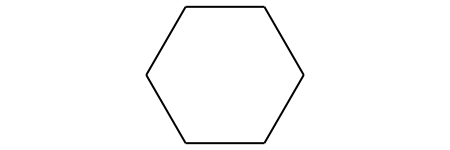

In [2]:
m = Chem.MolFromSmiles('C1CCCCC1')   # 숫자 1은 하나의 고리의 시작점과 끝점을 표시
m

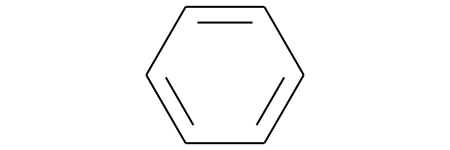

In [3]:
m1 = Chem.MolFromSmiles('c1ccccc1')    # 소문자 표기는 방향족(Aromatic)임을 표시
m1

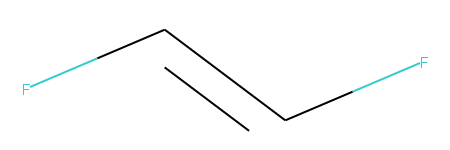

In [4]:
m2 = Chem.MolFromSmiles('F/C=C/F')     # `cis` -vs- `trans` 의 표시
m2

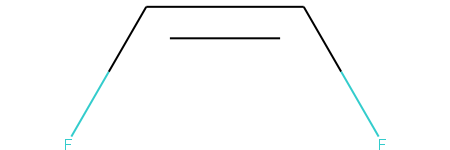

In [80]:
m3 = Chem.MolFromSmiles('F/C=C\F')
m3

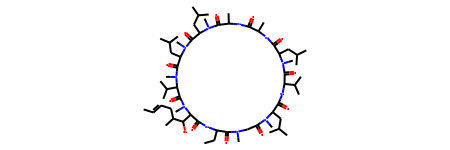

In [57]:
m4 = Chem.MolFromSmiles('C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C')
m4

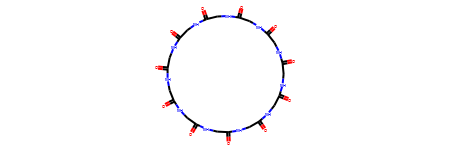

In [58]:
core = Chem.MolFromSmiles('C1C(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)N1')
core

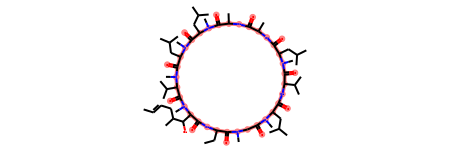

In [59]:
m4.GetSubstructMatch(core)
m

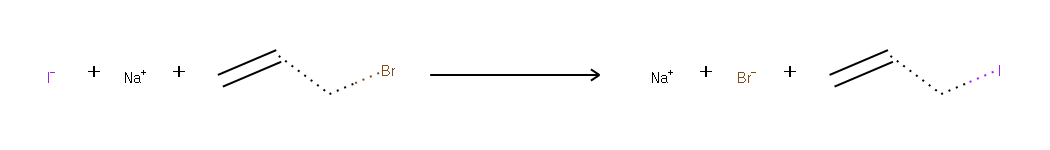

In [82]:
rxn = AllChem.ReactionFromSmarts('[I-].[Na+].C=CCBr >> [Na+].[Br-].C=CCI ')
rxn

### Reaction Atom Maps

> `Atom Map`은 컴퓨터가 반응물과 생성물사이의 같은 원자임을 알 수 있게 명확하게 표현해주는 방법이다.

* 원하는 원자의 뒤에 `:`와 숫자를 이용해 표시한다. ( `[CH3:2]` 는 `H`를 3개 가지고 있는 탄소에 2번을 부여함을 의미한다.  )
* 부여한 숫자는 추가적인 성질을 나타내지 않는다. 단지 구분짓기 위함이다. ( 단, 모든 원자에 같은 숫자를 부여할 경우는 제외. )

### Atom Map은 유일하거나 완전하지 않다.

1. 반응이 일어날 때, 분자에 결합을 표현하는데 한계가 있다. <br>
2. 반응매커니즘이 애매할 때 <br>
예를들어, ![secondcase](http://www.daylight.com/dayhtml/doc/theory/cope.gif) <br>
이 경우 실제로는 두가지의 다른 반응 매커니즘이 있지만,  `[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]`으로 표현해준다.
3. 반응에 대한 정보가 부족한 경우. <br>
확실한 정보에 대해서 부분적으로만 `Mapping`한다. 절대로 모르는 반응에 입력하려하면 안 된다.<br>
`Atom Map`은 `unique SMILES`에서 나타나지않는다. <br>
4. `Atom Map`은 어떤 의미도 가지지않는 숫자일 뿐이다.

# SMARTS (SMiles ARbitrary Target Specification)

* 분자의 패턴이나 성질을 표현하기 위한 언어이다.
* SMARTS는 SMILES의 연장선이며, 확장된 규칙을 이용해 더 넓은 범위의 표현을 활용할 수 있다.


> `SMILES`의 모든 기호(atoms & bonds)과 성질표현(원자의 표현, 전하, 이성질체의 명시)들은 `SMARTS`에서도 유효하다. <br>
 `SMARTS`는 확장된 논리적 연산자들과 부가적인 분자 표현법도 가지고있다. <br>
 
 

<h3>Symbol | <h3>Symbol name | <h3>Atomic property requirements | <h3>Default
---- | ---- | ----| ----
<h3>* |<h3> wildcard | <h3>any atom | <h3>(no default)
<h3>a |<h3> aromatic | <h3>aromatic | <h3>(no default)
<h3>A | <h3>aliphatic | <h3>aliphatic | <h3>(no default)
<h3>D<$n$> | <h3>degree | <h3><$n$> explicit connections |<h3> exactly one
<h3>H<$n$> | <h3>total-H-count |<h3> <$n$> attached hydrogens |<h3> exactly one
<h3>h<$n$> | <h3>implicit-H-count | <h3><$n$> implicit hydrogens |<h3> at least one
<h3>R<$n$> | <h3>ring membership | <h3>in <$n$> SSSR rings |<h3> any ring atom
<h3>r<$n$> | <h3>ring size | <h3>in smallest SSSR ring of size <$n$> |<h3> any ring atom
<h3>v<$n$> | <h3>valence | <h3>total bond order <$n$> |<h3> exactly one
<h3>X<$n$> | <h3>connectivity |<h3> <$n$> total connections | <h3>exactly one
<h3>x<$n$> | <h3>ring connectivity | <h3><$n$> total ring connections |<h3> at least one
<h3>- <$n$> | <h3>negative charge |<h3> -<$n$> charge |<h3> -1 charge (-- is -2, etc)
<h3>+<$n$> | <h3>positive charge | <h3>+<$n$> formal charge | <h3>+1 charge (++ is +2, etc)
<h3>#n | <h3>atomic number | <h3>atomic number <$n$> | <h3>(no default)
<h3>@ | <h3>chirality | <h3>anticlockwise | <h3>anticlockwise, default class
<h3>@@ | <h3>chirality | <h3>clockwise | <h3>clockwise, default class
<h3>@<$c$><$n$> | <h3>chirality |<h3> chiral class <$c$> chirality <$n$> | <h3>(nodefault)
<h3>@<$c$><$n$>? | <h3>chiral or unspec |<h3> chirality <$c$><$n$> or unspecified | <h3>(no default)
<h3><$n$> | <h3>atomic mass | <h3>explicit atomic mass |<h3> unspecified mass

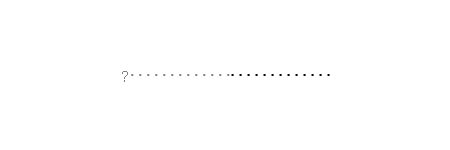

In [44]:
a = AllChem.MolFromSmarts('C*')
a

In [55]:
naphthalene = Chem.MolFromSmiles('c12ccccc1cccc2')
benzoxazole = Chem.MolFromSmiles('n1c2ccccc2oc1')
indane = Chem.MolFromSmiles('c1ccc2c(c1)CCC2')
skatole = Chem.MolFromSmiles('CC1=CNC2=CC=CC=C12')
benzene = Chem.MolFromSmiles('c1ccccc1')
quinoline = Chem.MolFromSmiles('n1cccc2ccccc12')

my_molecules = [naphthalene, 
                benzoxazole,
                indane,
                skatole,
                benzene,
                quinoline,
               ]

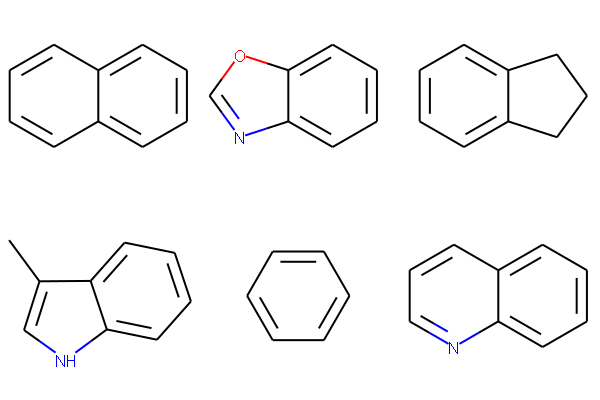

In [56]:
Draw.MolsToGridImage(my_molecules, useSVG=False)

In [53]:
is_in_two_rings = Chem.MolFromSmarts('[R2]')
[mol.HasSubstructMatch(is_in_two_rings) for mol in my_molecules]

[True, True, True, True, False, True]

In [75]:
mol1 = Chem.MolFromSmiles('c1ccccc1')
mol2 = Chem.MolFromSmiles('n1ccccc1')
mol3 = Chem.MolFromSmiles('C1CCCCC1')

my_mol = [mol1,
          mol2,
          mol3
         ]

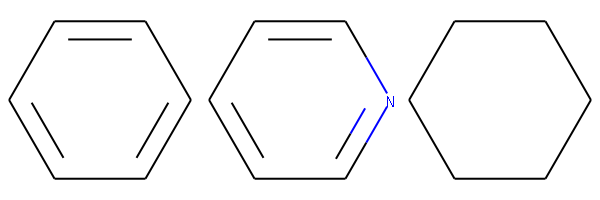

In [76]:
Draw.MolsToGridImage(my_mol, useSVG=False)

In [78]:
aromatic = Chem.MolFromSmarts('[a]')
[mol.HasSubstructMatch(aromatic) for mol in my_mol]

[True, True, False]

### Logical Operators

<h3>Symbol | <h3>Expression | <h3>Meaning
---------|-------|----------
<h3>exclamation | <h3>!e1 | <h3>not e1
<h3>ampersand |<h3> e1&e2 | <h3>a1 and e2 (high precedence)
<h3>comma | <h3>e1,e2 | <h3>e1 or e2
<h3>semicolon | <h3>e1;e2 | <h3>e1 and e2 (low precedence)

In [79]:
notaromatic = Chem.MolFromSmarts('[!a]')
[mol.HasSubstructMatch(notaromatic) for mol in my_mol]

[False, False, True]

### CT files(Chemical Table files)

* 화합물에 필요한 구조정보들을 담고있는 파일. 가지고 있는 정보에 따라서 여러 형식이 있다.



> 가장 많이 쓰이는 files format(Molfiles, SDfiles)

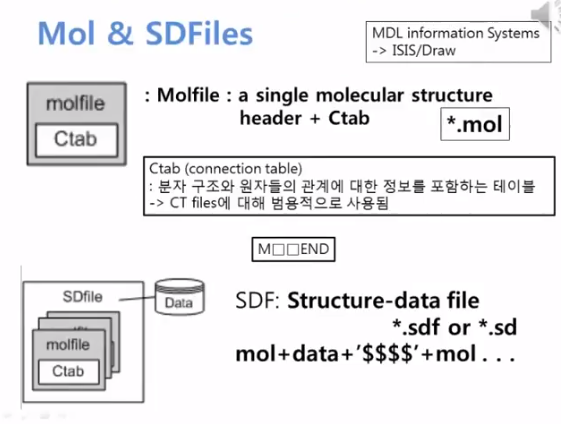

* header : molecule의 이름이나, 저장된 시간을 나타내는 부분
* Ctab : 가장 기본적인 부분
* '`$$$$`' : 한 분자와 다른 분자를 나누는 경계를 표현


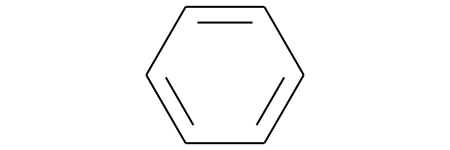

In [97]:
a = AllChem.MolFromSmiles('c1ccccc1')
a

In [98]:
mfile = AllChem.MolToMolBlock(a)
print(mfile)


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



In [99]:
# Mol fils 형식으로 저장
f = open('benzene.mol','w')
f.write(Chem.MolToMolBlock(a))
f.close()

In [102]:
from rdkit.Chem import Descriptors

# 분자량 계산
print(Descriptors.MolWt(a))

78.11399999999999


In [103]:
print(Descriptors.RingCount(a))

1


In [104]:
# 분자가 여러개로 되어있는 sdf file을 handling하기 위한 function
db = Chem.SDMolSupplier('db2145.sdf')

In [105]:
mols = [x for x in db if x is not None]
print(len(mols))

2145


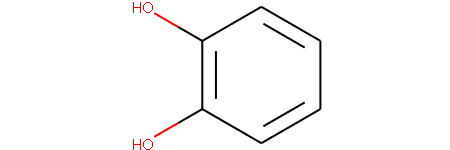

In [107]:
query = Chem.MolFromSmiles('c1(O)c(O)cccc1')
query

In [108]:
subst = [x for x in mols if x.HasSubstructMatch(query)]

In [109]:
print(len(subst))

375


In [110]:
for i in range(len(subst)) : print (Chem.MolToSmiles(subst[i]))

CCOc1cc(/C=N/NC(=O)c2ccccc2C)ccc1OCc1ccccc1
COc1cc(/C=N/NC(=O)c2ccccc2C)cc(Cl)c1OC
CCOc1cc(/C=N/NC(=O)c2ccccc2C)cc(Cl)c1OC
C#CCOc1ccc(/C=N/NC(=O)c2ccccc2C)cc1OCC
C#CCOc1c(Cl)cc(/C=N/NC(=O)c2ccccc2C)cc1OC
CCCOc1c(Cl)cc(/C=N/NC(=O)c2ccccc2C)cc1OCC
COc1cc(/C=N/NC(=O)c2ccccc2C)ccc1OCC(N)=O
COc1cc(/C=N/NC(=O)c2ccccc2C)ccc1OCc1ccc([N+](=O)[O-])cc1
COc1cc(/C=N/NC(=O)c2ccccc2C)cc(Cl)c1OC(C)C
C/C(=N\NC(=O)c1ccccc1C)c1ccc2c(c1)OCCO2
COc1cc(/C=N/NC(=O)c2ccccc2C)ccc1OCc1ccc(F)cc1
CCOc1cc(/C=N/NC(=O)c2ccccc2C)cc(Br)c1OC
CCOc1c(Br)cc(/C=N/NC(=O)c2ccccc2C)cc1OC
C=CCOc1c(Br)cc(/C=N/NC(=O)c2ccccc2C)cc1OCC
CCCOc1ccc(/C=N/NC(=O)c2ccccc2C)cc1OC
CCCOc1ccc(/C=N/NC(=O)c2ccccc2C)cc1OCC
CCOc1cc(/C=N/NC(=O)Cc2cccs2)ccc1OC
C#CCOc1ccc(/C=N/NC(=O)c2ccc(Cl)cc2)cc1OCC
COc1cc(/C=N/NC(=O)CNC(=O)c2ccncc2)ccc1OC(C)=O
COc1cc(/C=N/Nc2ccccc2)ccc1OS(=O)(=O)c1ccc(C)cc1
COc1ccc(/C=N/Nc2nncn2N)cc1O
COc1ccc(NC(=O)C/C(C)=N/NC(=O)c2ccc(OC)c(OC)c2)cc1
COc1ccc(C(=O)N/N=C(\C)CC(=O)N2CCCCC2)cc1OC
COc1ccc(/C=N/NC(=O)C(=O)NCc2ccc(C)cc2

### Avogadro

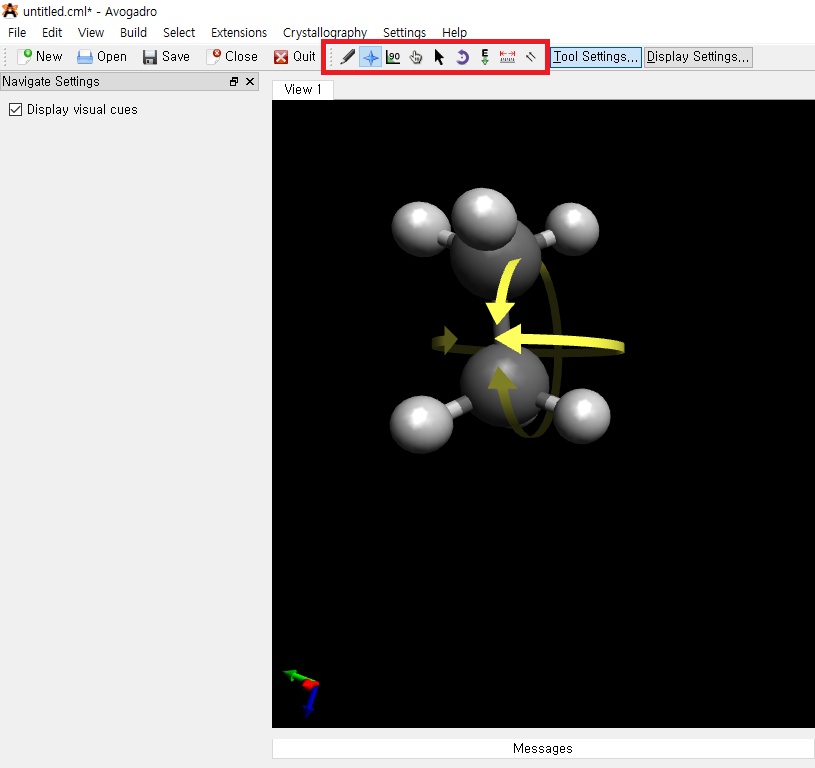

### SAMSON

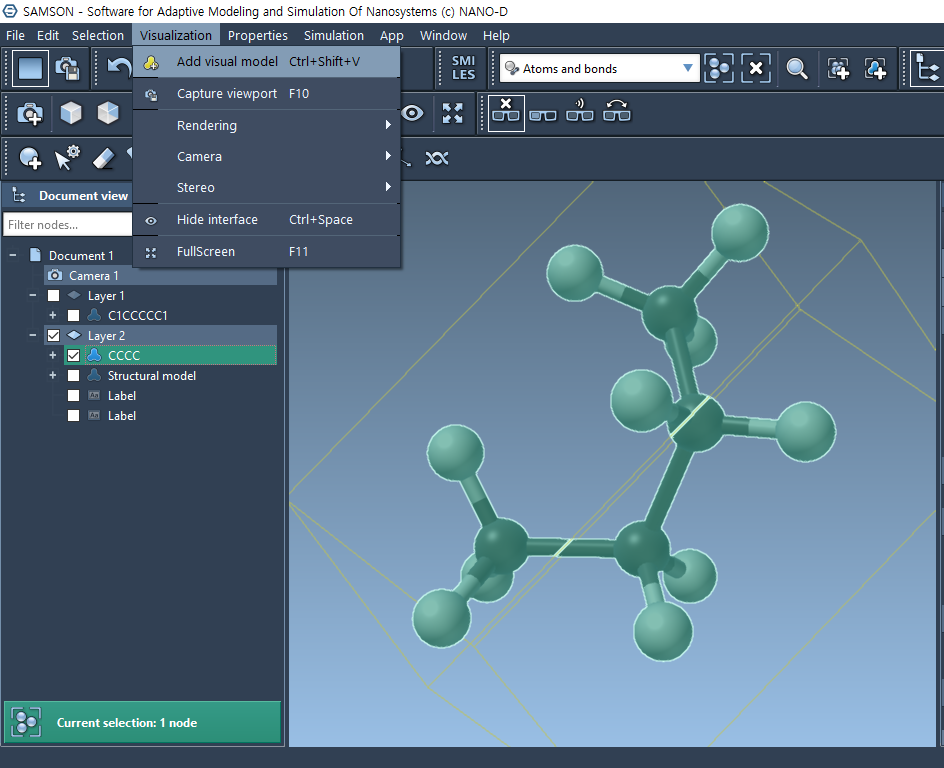


* [SMILES Theory in Daylight](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
* [SMILES Tutorial in Daylight](https://www.daylight.com/dayhtml_tutorials/languages/smiles/index.html)
<br>
<br>
* [SMARTS Theory in Daylight](http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)
* [SMARTS Tutorial in Daylight](http://www.daylight.com/dayhtml_tutorials/languages/smarts)
<br>
<br>
* [RDkit](https://www.rdkit.org/)
* [RDkit API Reference](https://www.rdkit.org/docs/api-docs.html) 에서 더 많은 패키지, 모듈에 대한 정보를 확인할 수 있다.
* [RDkit와 같은 다른 Cheminformatics tools](https://en.wikipedia.org/wiki/Cheminformatics_toolkits)
* [Rdkit Doc](http://rdkit.org/docs/cppapi/namespaceRDKit.html)
* [Data base](https://pubchemdocs.ncbi.nlm.nih.gov/downloads)
<br>
<br>
* [숭실대 동영상 자료](https://www.youtube.com/watch?v=iUrV7auDw2c)